# **Hackathon: Shinkansen Travel Experience Satisfaction Prediction**

---------------

## **Context**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who travelled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labelled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labelled ‘Overall_Experience’. 

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.
 

## **Objective**

The goal of the problem is to **predict whether a passenger was satisfied or not** considering his/her overall experience of traveling on the Shinkansen Bullet Train.


## **Data Description**

| Column Name | Column Description | Column Value Examples |
| --- | --- | --- |
|ID|	The unique ID of the passenger |	Continuous values like 98800001, 98800002, etc.|
|Gender|	The gender of the passenger|	Male<br> Female|
|Customer_Type|	Loyalty type of the passenger|	Loyal Customer<br> Disloyal Customer|
|Age|	The age of the passenger|	Continuous values like 48, 52, 9, etc.|
|Type_Travel|	Purpose of travel for the passenger|	Personal Travel<br> Business Travel|
|Travel_Class|	The train class that the passenger traveled in|	Business<br> Eco|
|Travel_Distance| 	The distance traveled by the passenger|	Continuous values like 272, 780, 853, etc.|
|Departure_Delay_in_Mins|	The delay (in minutes) in train departure|	Continuous values like 9, 15, 13, etc.|
|Arrival_Delay_in_Mins|	The delay (in minutes) in train arrival|	Continuous values like 0, 15, 18, etc.|



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the libraries required**

In [2]:
import cupy as xp 
import sklearn.model_selection

In [3]:

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
# plot_confusion_matrix is already deprecated. Changed to: ConfusionMatrixDisplay instead
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,ConfusionMatrixDisplay,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [4]:
# Loading the dataset (train data and test data)
# train data
surveydata_train=pd.read_csv("/content/drive/MyDrive/MIT/Hackathon_Dataset/Train_Data/Surveydata_train.csv")
traveldata_train=pd.read_csv("/content/drive/MyDrive/MIT/Hackathon_Dataset/Train_Data/Traveldata_train.csv")

# test data
surveydata_test=pd.read_csv("/content/drive/MyDrive/MIT/Hackathon_Dataset/Test_Data/Surveydata_test.csv")
traveldata_test=pd.read_csv("/content/drive/MyDrive/MIT/Hackathon_Dataset/Test_Data/Traveldata_test.csv")

## **Overview of the dataset**

### **View the first and last 5 rows of the train dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [ ]:
traveldata_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
traveldata_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [ ]:
surveydata_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
surveydata_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


### **View the first and last 5 rows of the test dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [ ]:
surveydata_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [ ]:
surveydata_test.tail()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


In [ ]:
traveldata_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [ ]:
traveldata_test.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


### **Merge Survey and Travel Data**

In [5]:
train_data = pd.merge(traveldata_train, surveydata_train, on="ID")
test_data = pd.merge(traveldata_test, surveydata_test, on="ID")

In [ ]:
traveldata_train.shape

(94379, 9)

In [ ]:
surveydata_train.shape

(94379, 17)

In [ ]:
train_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
test_data.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


### **Understand the shape of the dataset**

In [4]:
train_data.shape

(94379, 25)

In [5]:
test_data.shape

(35602, 24)

* The train dataset has 94,379 rows and 25 columns. 
* The test dataset has 35,602 rows and 24 columns. 

### **Check the data types of the columns for the dataset**

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

- We can see that x columns have less than 94,379 non-null values i.e. columns have missing values.

The columns that have missing values:
- Gender                   94302 non-null  object 
- Customer_Type            85428 non-null  object 
- Age                      94346 non-null  float64
- Type_Travel              85153 non-null  object 
- Departure_Delay_in_Mins  94322 non-null  float64
- Arrival_Delay_in_Mins    94022 non-null  float64
- Seat_Comfort             94318 non-null  object 
- Arrival_Time_Convenient  85449 non-null  object 
- Catering                 85638 non-null  object 
- Platform_Location        94349 non-null  object 
- Onboard_Wifi_Service     94349 non-null  object 
- Onboard_Entertainment    94361 non-null  object 
- Online_Support           94288 non-null  object 
- Ease_of_Online_Booking   94306 non-null  object 
- Onboard_Service          86778 non-null  object 
- Legroom                  94289 non-null  object 
- Baggage_Handling         94237 non-null  object 
- CheckIn_Service          94302 non-null  object 
- Cleanliness              94373 non-null  object 
- Online_Boarding          94373 non-null  object 

### **Check the percentage of missing values in each column**

In [ ]:
pd.DataFrame(data={'% of Missing Values':round(train_data.isna().sum()/train_data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
Type_Travel,9.78
Customer_Type,9.48
Arrival_Time_Convenient,9.46
Catering,9.26
Onboard_Service,8.05
Arrival_Delay_in_Mins,0.38
Baggage_Handling,0.15
Legroom,0.10
Online_Support,0.10
CheckIn_Service,0.08


### **Check the number of unique values in each column**

In [ ]:
train_data.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

- We can drop the column - ID as it is unique for each customer and will not add value to the model.
- Most of the variables are categorical except - Age, Travel_Distance, Departure_Delay_in_Mins, Arrival_Delay_in_Mins      

**Dropping the unique values column**

In [6]:
# Dropping ID column for train data
train_data.drop(columns='ID',inplace=True)

In [8]:
# Keep ID column for test data
# test_data.drop(columns='ID',inplace=True)

**Let's check the statistical summary of the data.**

In [13]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


**Write your Answer here :**

- Mean and median of age column are very close to each other i.e. approx 39 and 40 respectively.
- A couple of variables have outliers: Departure_Delay_in_Mins and Arrival_Delay_in_Mins since the 75th percentile and max has a huge gap. We need to explore this further.
- It seems like Travel_Distance has some outliers at both ends. We need to explore this further.

- We can see that the target variable - Overall_Experience is close to balance with mean approx ~0.55 with slight more customers that are satisfied

### **Check the count of each unique category in each of the categorical variables.** 

In [7]:
# Making a list of all catrgorical variables 
cat_col=['Gender', 'Customer_Type','Type_Travel', 'Travel_Class', 'Seat_Comfort',
       'Seat_Class', 'Arrival_Time_Convenient', 'Catering',
       'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment',
       'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling','CheckIn_Service','Cleanliness','Online_Boarding']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(train_data[column].value_counts())
    print('-'*50)

Female    47815
Male      46487
Name: Gender, dtype: int64
--------------------------------------------------
Loyal Customer       69823
Disloyal Customer    15605
Name: Customer_Type, dtype: int64
--------------------------------------------------
Business Travel    58617
Personal Travel    26536
Name: Type_Travel, dtype: int64
--------------------------------------------------
Eco         49342
Business    45037
Name: Travel_Class, dtype: int64
--------------------------------------------------
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: Seat_Comfort, dtype: int64
--------------------------------------------------
Green Car    47435
Ordinary     46944
Name: Seat_Class, dtype: int64
--------------------------------------------------
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 136

- The majority of the customers are loyal.
- The majority of the customers use the service for business travel.

In [8]:
# Converting the data type of each categorical variable to 'category'
for column in cat_col:
    train_data[column]=train_data[column].astype('category')

In [9]:
# Converting the data type of each categorical variable to 'category'
for column in cat_col:
    test_data[column]=test_data[column].astype('category')

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   94302 non-null  category
 1   Customer_Type            85428 non-null  category
 2   Age                      94346 non-null  float64 
 3   Type_Travel              85153 non-null  category
 4   Travel_Class             94379 non-null  category
 5   Travel_Distance          94379 non-null  int64   
 6   Departure_Delay_in_Mins  94322 non-null  float64 
 7   Arrival_Delay_in_Mins    94022 non-null  float64 
 8   Overall_Experience       94379 non-null  int64   
 9   Seat_Comfort             94318 non-null  category
 10  Seat_Class               94379 non-null  category
 11  Arrival_Time_Convenient  85449 non-null  category
 12  Catering                 85638 non-null  category
 13  Platform_Location        94349 non-null  category
 14  Onboar

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       35602 non-null  int64   
 1   Gender                   35572 non-null  category
 2   Customer_Type            32219 non-null  category
 3   Age                      35591 non-null  float64 
 4   Type_Travel              32154 non-null  category
 5   Travel_Class             35602 non-null  category
 6   Travel_Distance          35602 non-null  int64   
 7   Departure_Delay_in_Mins  35573 non-null  float64 
 8   Arrival_Delay_in_Mins    35479 non-null  float64 
 9   Seat_Comfort             35580 non-null  category
 10  Seat_Class               35602 non-null  category
 11  Arrival_Time_Convenient  32277 non-null  category
 12  Catering                 32245 non-null  category
 13  Platform_Location        35590 non-null  category
 14  Onboar

In [10]:
df = train_data.copy()

## **Exploratory Data Analysis**

### **Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [20]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, orient="h", showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

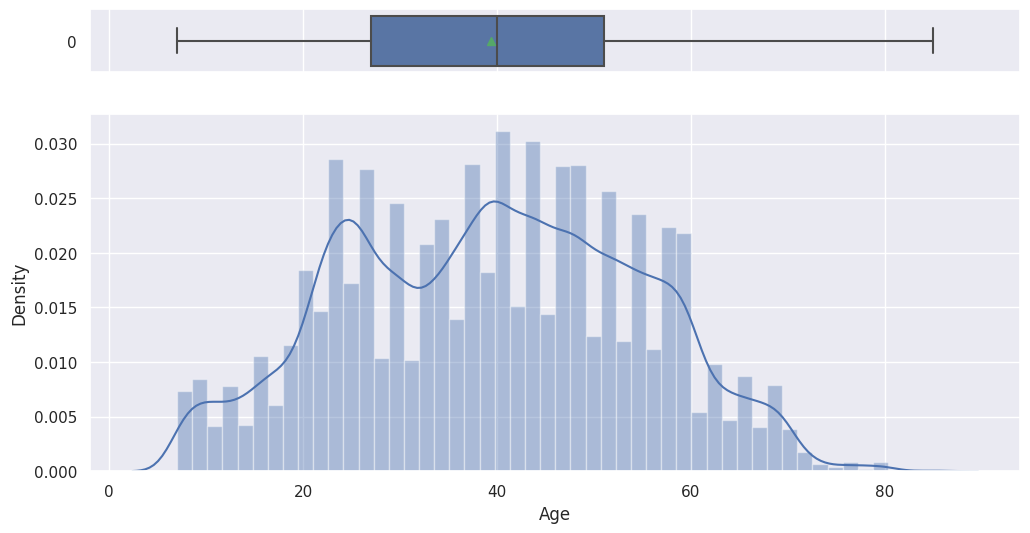

In [21]:
hist_box(df, "Age")

- Age distribution looks approximately normally distributed.
- The boxplot for the age column confirms that there are no outliers for this variable

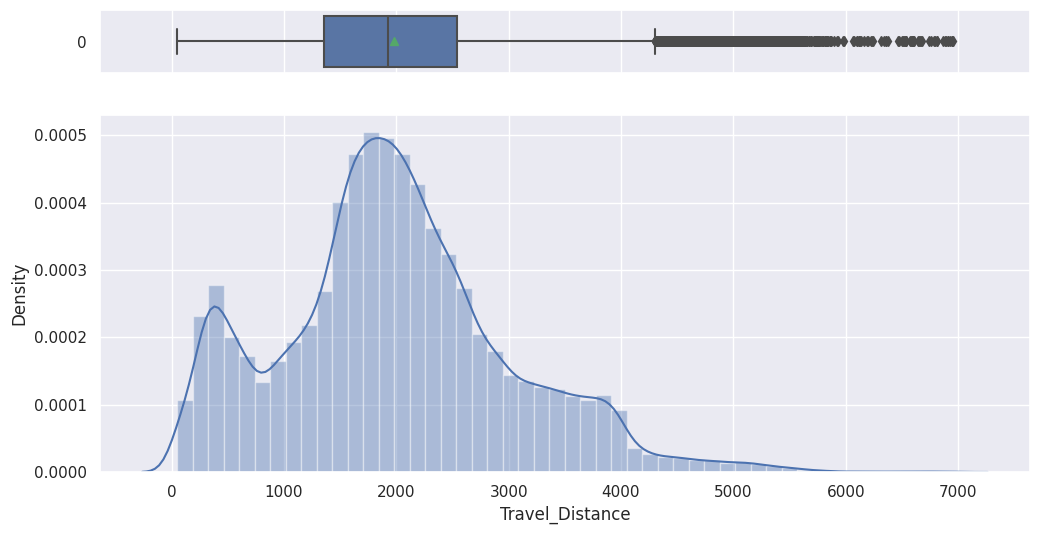

In [22]:
hist_box(df, 'Travel_Distance')

- The distribution for the duration of Travel_Distance is right-skewed.
- There are some observations that can be considered as outliers as they are very far from the upper whisker in the boxplot. Let's check how many such extreme values are there.

In [23]:
df[df['Travel_Distance']>4400]

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
51,Female,Loyal Customer,26.0,Business Travel,Business,4560,0.0,7.0,0,Poor,...,Poor,Extremely Poor,Poor,Poor,NaN,Poor,Good,Acceptable,Good,Poor
79,Male,Loyal Customer,25.0,NaN,Business,5406,0.0,0.0,0,Needs Improvement,...,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Poor,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement
112,Male,Loyal Customer,26.0,Business Travel,Business,4615,17.0,6.0,1,Good,...,Good,Good,Good,Good,Acceptable,Needs Improvement,Good,Poor,Excellent,Good
115,Male,Loyal Customer,22.0,Business Travel,Business,4733,0.0,2.0,0,Acceptable,...,Acceptable,Acceptable,Acceptable,Acceptable,Needs Improvement,Needs Improvement,Good,Poor,Good,Acceptable
133,Female,Loyal Customer,24.0,NaN,Business,5135,0.0,0.0,0,Needs Improvement,...,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Good,Poor,Acceptable,Needs Improvement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94081,Male,Loyal Customer,22.0,Business Travel,Business,4439,0.0,0.0,1,Good,...,Excellent,Good,Excellent,Excellent,Good,Acceptable,Excellent,Acceptable,Good,Excellent
94149,Female,Loyal Customer,25.0,Personal Travel,Eco,6655,0.0,0.0,0,Needs Improvement,...,Needs Improvement,Excellent,Needs Improvement,Excellent,Acceptable,Good,Good,Needs Improvement,Acceptable,Needs Improvement
94170,Male,Loyal Customer,31.0,Business Travel,Business,4617,68.0,56.0,0,Poor,...,Poor,Needs Improvement,Poor,Poor,Acceptable,Excellent,Good,Poor,Acceptable,Poor
94295,Male,Loyal Customer,30.0,Business Travel,Business,4927,26.0,25.0,0,Needs Improvement,...,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,NaN,Good,Acceptable,Acceptable,Good,Needs Improvement


- We can see that there are about 1700+ observations which can be considered as outliers.

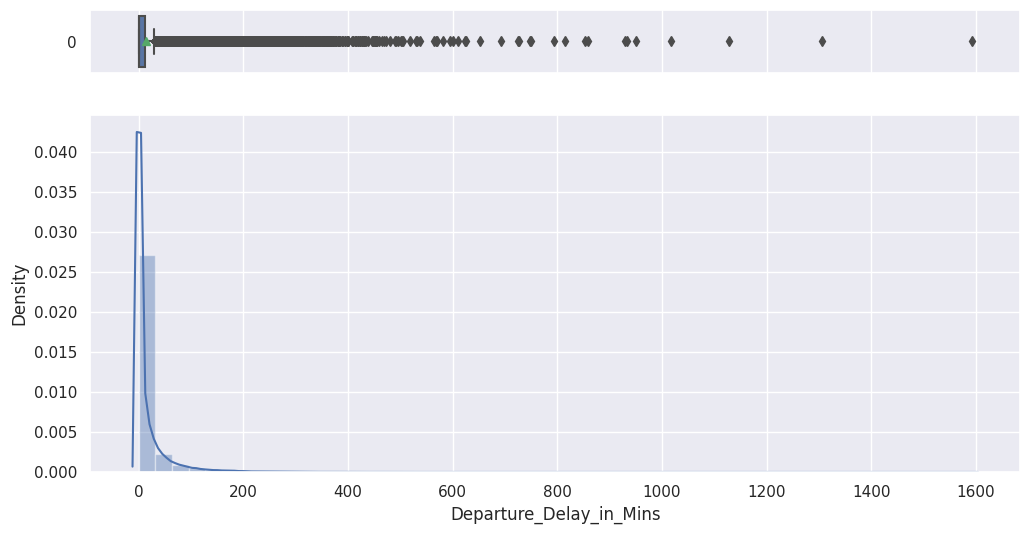

In [24]:
hist_box(df, 'Departure_Delay_in_Mins')

- The distribution for Departure_Delay_in_Mins is extremely rightly skewed
- Let's check how many such extreme values are there. 

In [26]:
df[(df.Departure_Delay_in_Mins>100)]

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
102,Male,Loyal Customer,23.0,Personal Travel,Eco,3064,113.0,120.0,0,Needs Improvement,...,Poor,Needs Improvement,Poor,Poor,Good,Excellent,Excellent,Good,Excellent,Poor
140,Male,Loyal Customer,7.0,NaN,Eco,2250,125.0,107.0,0,Acceptable,...,Excellent,Acceptable,Excellent,Excellent,Acceptable,Excellent,Acceptable,Acceptable,Good,Excellent
182,Female,NaN,65.0,Business Travel,Business,1972,118.0,102.0,0,Poor,...,Poor,Poor,Poor,Poor,Good,Needs Improvement,Good,Poor,Acceptable,Poor
223,Male,Disloyal Customer,27.0,Business Travel,Eco,2082,149.0,139.0,0,Acceptable,...,Acceptable,Good,Good,Acceptable,Acceptable,Needs Improvement,Acceptable,Good,Good,Good
230,Male,NaN,27.0,Business Travel,Business,4943,181.0,NaN,1,Poor,...,Good,Acceptable,Acceptable,Good,Good,Excellent,Good,Acceptable,Good,Acceptable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94285,Female,NaN,33.0,Business Travel,Eco,1280,110.0,112.0,0,Needs Improvement,...,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Acceptable,Excellent,Good,Needs Improvement,Good,Needs Improvement
94296,Male,Loyal Customer,26.0,Business Travel,Business,3352,123.0,141.0,0,Good,...,Good,Good,Good,Poor,Good,Needs Improvement,Acceptable,Good,Needs Improvement,Good
94324,Male,NaN,35.0,Business Travel,Business,2592,610.0,593.0,1,Excellent,...,Acceptable,Acceptable,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Acceptable,Acceptable,Poor,Acceptable
94328,Female,Loyal Customer,52.0,NaN,Eco,2160,211.0,213.0,0,Needs Improvement,...,Needs Improvement,Acceptable,Acceptable,Excellent,Good,Excellent,Excellent,Acceptable,Acceptable,Acceptable


- There are arond 3072 such observations which can be considered as outliers.

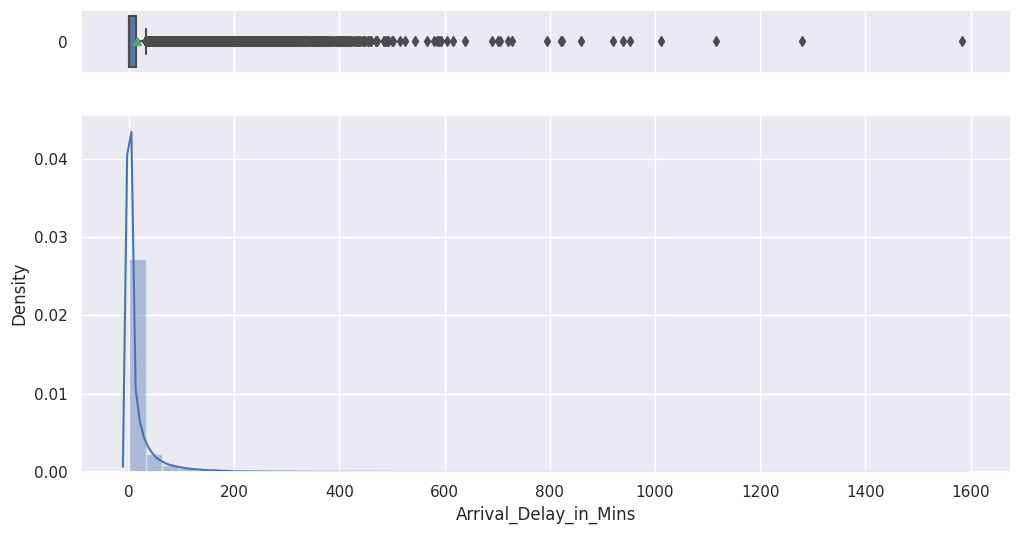

In [27]:
hist_box(df,'Arrival_Delay_in_Mins')

- The distribution for the Arrival_Delay_in_Mins is right-skewed like Departure_Delay_in_Mins
- There seems to be a correlation between these 2 variables. It could be that getting delayed for departure is heavily affecting getting delayed for the arrival of the train.
- Boxplot shows that the Arrival_Delay_in_Mins has some outliers at the right end. Let's check how many such extreme values are there. 

In [28]:
df.Arrival_Delay_in_Mins.value_counts(normalize=True)

0.0      0.562794
1.0      0.021218
2.0      0.020197
3.0      0.018687
4.0      0.018219
           ...   
586.0    0.000011
399.0    0.000011
920.0    0.000011
267.0    0.000011
593.0    0.000011
Name: Arrival_Delay_in_Mins, Length: 434, dtype: float64

- We can see that most of the customers i.e. 56% have 0 delays for arrival.

**Removal of Outliers.**

None of the outliers will be removed for this project since we want to retain all data for both training and test.

In [ ]:
# Dropping outlier
# df.drop(index=df[df.(variable name) > (number)].index,inplace=True)


#### **Let's understand the distribution of the categorical variables**

**Gender**

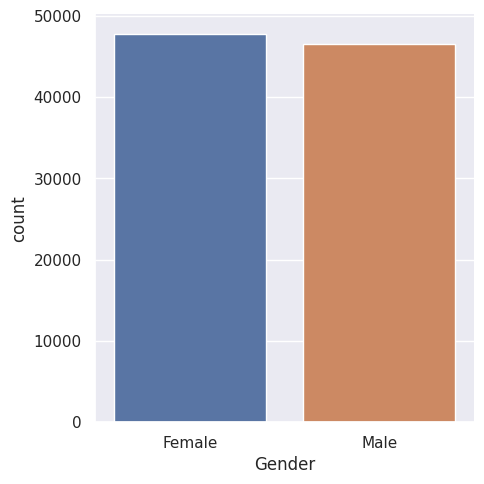

In [45]:
sns.catplot(data=df, x="Gender", kind="count")
plt.show()

In [30]:
df['Gender'].value_counts(normalize=True)

Female    0.507041
Male      0.492959
Name: Gender, dtype: float64

- There's almost an equal number of Male and Female customers

**Seat_Comfort**

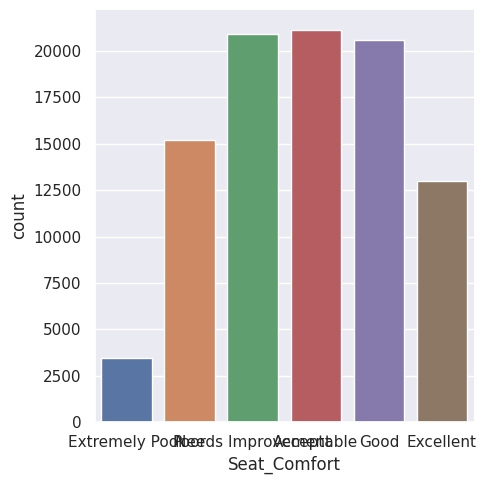

In [44]:
sns.catplot(data=df, x="Seat_Comfort", kind="count", order=["Extremely Poor","Poor","Needs Improvement","Acceptable","Good","Excellent"])
plt.show()

In [42]:
df['Seat_Comfort'].value_counts(normalize=True)

Acceptable           0.224326
Needs Improvement    0.222079
Good                 0.218357
Poor                 0.160998
Excellent            0.137524
Extremely Poor       0.036716
Name: Seat_Comfort, dtype: float64

- The majority of customers rated Seat_Comfort as 'acceptable'
- Less people rated Seat_Comfot as 'extremely poor'

### **Bivariate Analysis**

#### **Find and visualize the correlation matrix using a heatmap**



In [11]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

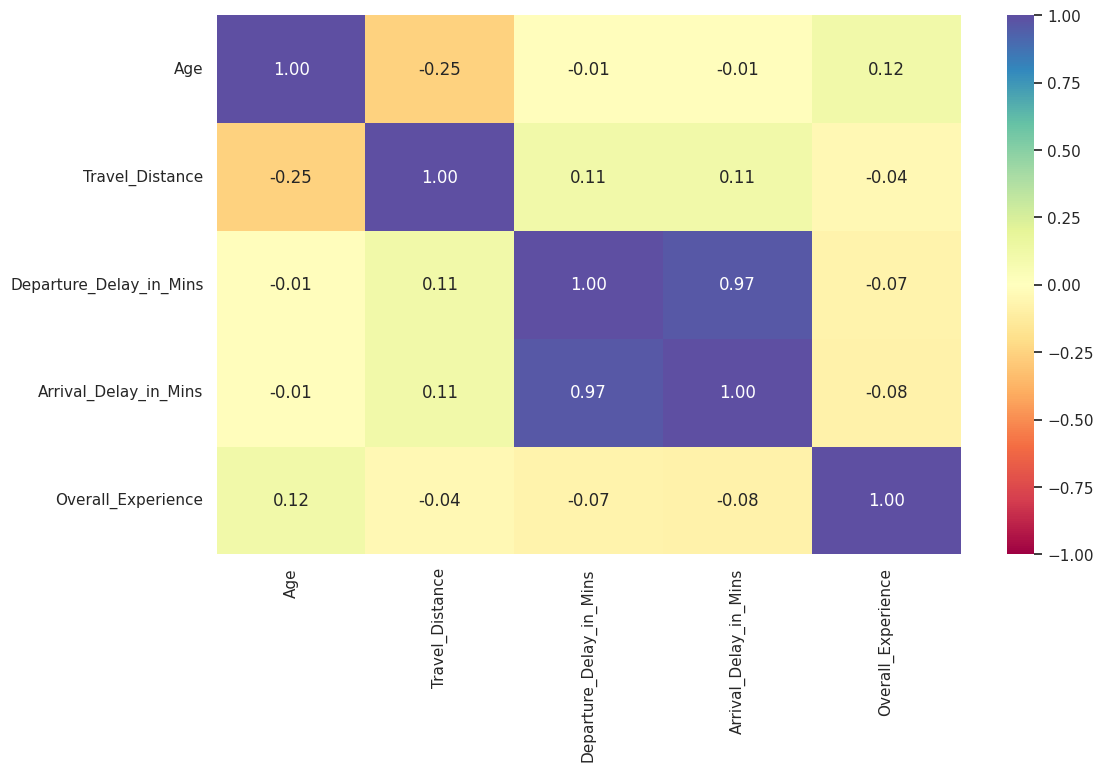

In [47]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [48]:
num_col

['Age',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Overall_Experience']

- None of the variable have a good correlation with our target variable "Overall_Experience". The highest one is age at 0.12.
- Arrival_Delay_in_Mins and Departure_Delay_in_Mins are highly positively correlated (0.97). We may consider to drop one of these variables since they do have the same predictive power
- Travel_Distance and Age has a negative correlation (-0.25) which would infer that the older passengers don't travel at longer distances.
- No other variables have a high correlation among them.

We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [59]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Satisfied %')

#### **Plot the stacked barplot for the variable `Gender` against the target variable `Overall_Experience` using the stacked_barplot function**

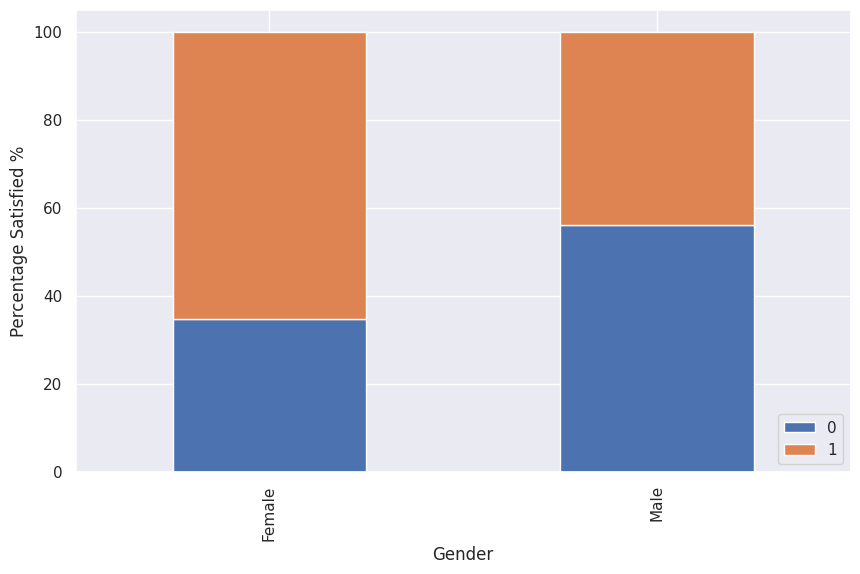

In [60]:
stacked_barplot(df, "Gender", "Overall_Experience" )

- More female passengers have an overall experience of satistifed at almost 70% while men are less satisfied at 45%.
 

#### **Seat_Comfort vs Overall_Experience**

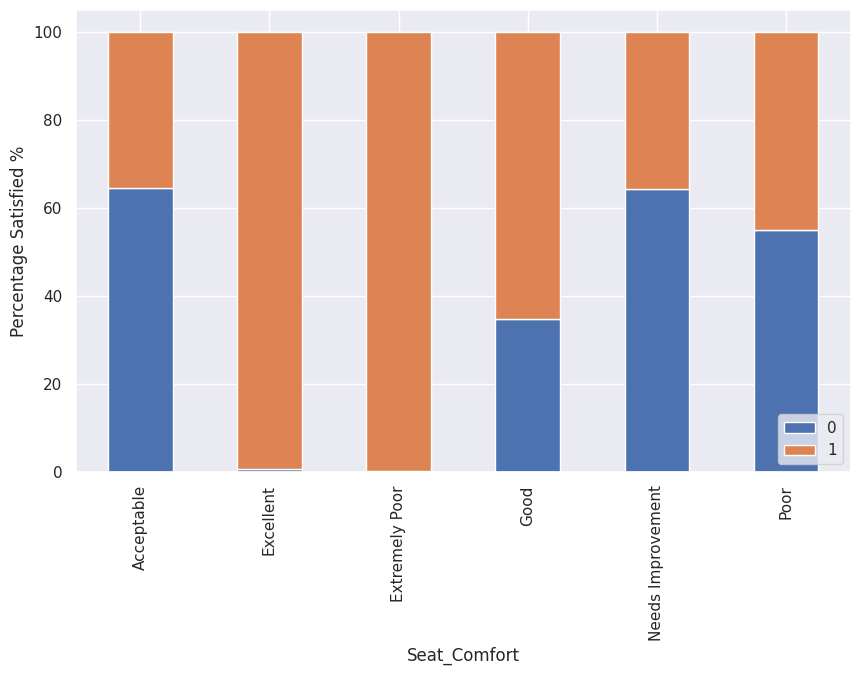

In [52]:
stacked_barplot(df, "Seat_Comfort", "Overall_Experience" )

## **Data Preparation for Modeling**


**Separating the independent variables (X) and the dependent variable (Y)**

In [12]:
# Separating target variable and other variables
X=train_data.drop(columns='Overall_Experience')
Y=train_data['Overall_Experience']

In [13]:
X_test_data = test_data.drop(columns='ID')
ID_test_data= test_data['ID']

Note: We won't be needing to define the Y column for the target test data since it doesn't exist yet. We are targeting to predict the "Overall_Experience" for this unknown data.

Note2: There's no need to split the dataset for target test data

### Splitting of dataset

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the stratified sampling technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [14]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42,stratify=Y)

**As we saw earlier, our data has missing values. We will impute missing values using median for continuous variables and mode for categorical variables. We will use `SimpleImputer` to do this.**

**The `SimpleImputer` provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median, or most frequent) of each column in which the missing values are located.**

In [15]:
num_col.remove('Overall_Experience')

In [16]:
num_col

['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [17]:
si1=SimpleImputer(strategy='median')

median_imputed_col=num_col

# Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [18]:
#Transforms the target test data (doesn't use any data from training data)
X_test_data[median_imputed_col]=si1.fit_transform(X_test_data[median_imputed_col])

In [19]:
cat_col

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [20]:
si2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=cat_col

# Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

# Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [21]:
# Fit and transform the target test data
X_test_data[mode_imputed_col]=si2.fit_transform(X_test_data[mode_imputed_col])

In [22]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())
print('-'*30)
print(X_test_data.isna().sum())

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64
------------------------------
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0

**Let's create dummy variables for string type variables and convert other column types back to float.**

In [ ]:
#converting data types of columns to float
# for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
#     X_train[column]=X_train[column].astype('float')
#     X_test[column]=X_test[column].astype('float')

In [23]:
#List of columns to create a dummy variables
col_dummy=cat_col

In [24]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

In [25]:
#Encoding categorical varaibles for target test data
X_test_data=pd.get_dummies(X_test_data, columns=col_dummy, drop_first=True)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 5759 to 25552
Data columns (total 78 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        66065 non-null  float64
 1   Travel_Distance                            66065 non-null  float64
 2   Departure_Delay_in_Mins                    66065 non-null  float64
 3   Arrival_Delay_in_Mins                      66065 non-null  float64
 4   Gender_Male                                66065 non-null  uint8  
 5   Customer_Type_Loyal Customer               66065 non-null  uint8  
 6   Type_Travel_Personal Travel                66065 non-null  uint8  
 7   Travel_Class_Eco                           66065 non-null  uint8  
 8   Seat_Comfort_Excellent                     66065 non-null  uint8  
 9   Seat_Comfort_Extremely Poor                66065 non-null  uint8  
 10  Seat_Comfort_Good  

In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28314 entries, 63209 to 60831
Data columns (total 75 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        28314 non-null  float64
 1   Travel_Distance                            28314 non-null  float64
 2   Departure_Delay_in_Mins                    28314 non-null  float64
 3   Arrival_Delay_in_Mins                      28314 non-null  float64
 4   Gender_Male                                28314 non-null  uint8  
 5   Customer_Type_Loyal Customer               28314 non-null  uint8  
 6   Type_Travel_Personal Travel                28314 non-null  uint8  
 7   Travel_Class_Eco                           28314 non-null  uint8  
 8   Seat_Comfort_Excellent                     28314 non-null  uint8  
 9   Seat_Comfort_Extremely Poor                28314 non-null  uint8  
 10  Seat_Comfort_Good 

In [29]:
X_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        35602 non-null  float64
 1   Travel_Distance                            35602 non-null  float64
 2   Departure_Delay_in_Mins                    35602 non-null  float64
 3   Arrival_Delay_in_Mins                      35602 non-null  float64
 4   Gender_Male                                35602 non-null  uint8  
 5   Customer_Type_Loyal Customer               35602 non-null  uint8  
 6   Type_Travel_Personal Travel                35602 non-null  uint8  
 7   Travel_Class_Eco                           35602 non-null  uint8  
 8   Seat_Comfort_Excellent                     35602 non-null  uint8  
 9   Seat_Comfort_Extremely Poor                35602 non-null  uint8  
 10  Seat_Comfort_Good     

In [27]:
X_test.columns.difference(X_train.columns).tolist()

[]

In [28]:
X_train.columns.difference(X_test.columns).tolist()

['CheckIn_Service_Extremely Poor',
 'Online_Support_Extremely Poor',
 'Platform_Location_Very Inconvenient']

In [29]:
X_test_data.columns.difference(X_train.columns).tolist()

[]

In [30]:
X_train.columns.difference(X_test_data.columns).tolist()

['CheckIn_Service_Extremely Poor',
 'Cleanliness_Extremely Poor',
 'Onboard_Service_Extremely Poor',
 'Online_Support_Extremely Poor',
 'Platform_Location_Very Inconvenient']

In [31]:
# Adding columns that are different between the X_test and X_train dataset
X_test['CheckIn_Service_Extremely Poor']=0
X_test['Online_Support_Extremely Poor']=0
X_test['Platform_Location_Very Inconvenient']=0

In [32]:
X_train.columns.difference(X_test.columns).tolist()

[]

In [33]:
# Adding columns that are different between the X_test_data and X_train dataset
X_test_data['CheckIn_Service_Extremely Poor']=0
X_test_data['Cleanliness_Extremely Poor']=0
X_test_data['Onboard_Service_Extremely Poor']=0
X_test_data['Online_Support_Extremely Poor']=0
X_test_data['Platform_Location_Very Inconvenient']=0

In [34]:
# reorder columns
X_test = X_test[X_train.columns]
X_test_data = X_test_data[X_train.columns]

Load Data into GPU

In [35]:
# Move data to GPU
# X_train = xp.asarray(X_train)
# X_test =  xp.asarray(X_test)
# y_train = xp.asarray(y_train)
# y_test = xp.asarray(y_test)
# X_test_data =  xp.asarray(X_test_data)

In [36]:
# import tensorflow as tf
# tf.test.gpu_device_name()

'/device:GPU:0'

## **Model evaluation criterion:**

#### **The model can make wrong predictions as:**
1. Predicting a customer will be Satisfied and the customer is not satisfied 
2. Predicting a customer will not be satisfied and the customer is satisfied


### **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [35]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Logistic Regression**

#### **Build a Logistic Regression model (Use the sklearn library)**

In [40]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

#### **Check the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     29950
           1       0.88      0.87      0.87     36115

    accuracy                           0.86     66065
   macro avg       0.86      0.86      0.86     66065
weighted avg       0.86      0.86      0.86     66065



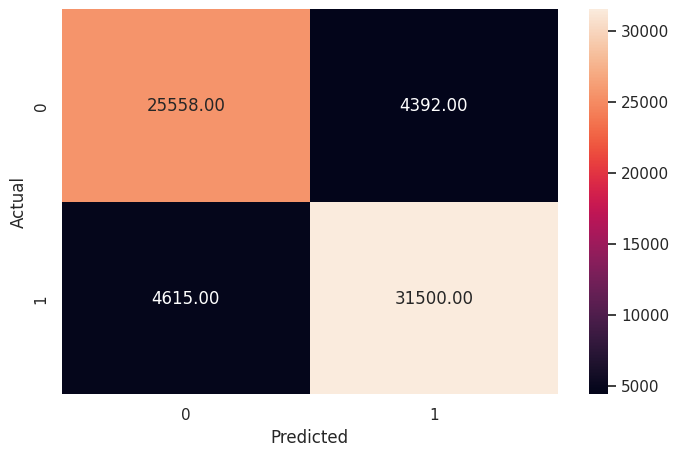

In [41]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

#### Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     12836
           1       0.88      0.87      0.87     15478

    accuracy                           0.86     28314
   macro avg       0.86      0.86      0.86     28314
weighted avg       0.86      0.86      0.86     28314



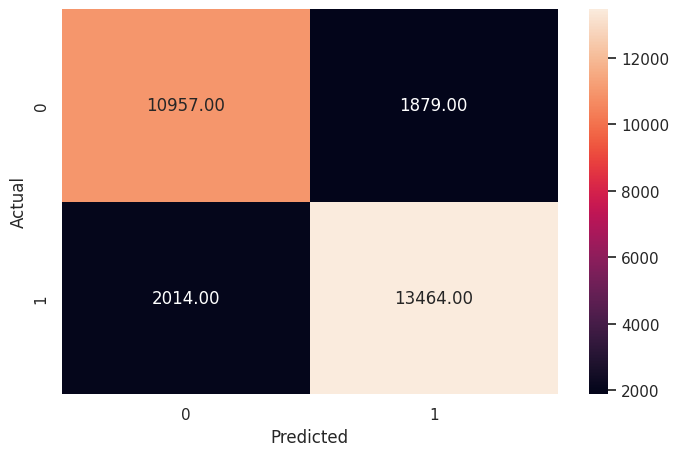

In [42]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

### Generate Results for Hackathon X_test_data

In [43]:
y_pred_X_test_data = lg.predict(X_test_data)

In [46]:
y_pred_X_test_data.size

35602

In [49]:
submission_1_pred_df = pd.DataFrame(y_pred_X_test_data, columns=['Overall_Experience'])  

In [53]:
submission_1_ID_df = pd.DataFrame(ID_test_data,columns=['ID'])

In [54]:
submission_1_df = submission_1_ID_df.join(submission_1_pred_df) 

In [56]:
submission_1_file_name = '/content/drive/MyDrive/MIT/Hackathon_Dataset/Submission_Hackathon_Apr2023_v1.csv'

In [58]:
submission_1_df.to_csv(submission_1_file_name, sep=',', encoding='utf-8', index=False)


#### **Find the optimal threshold for the model using the Precision-Recall Curve**

Precision-Recall curve summarizes the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**


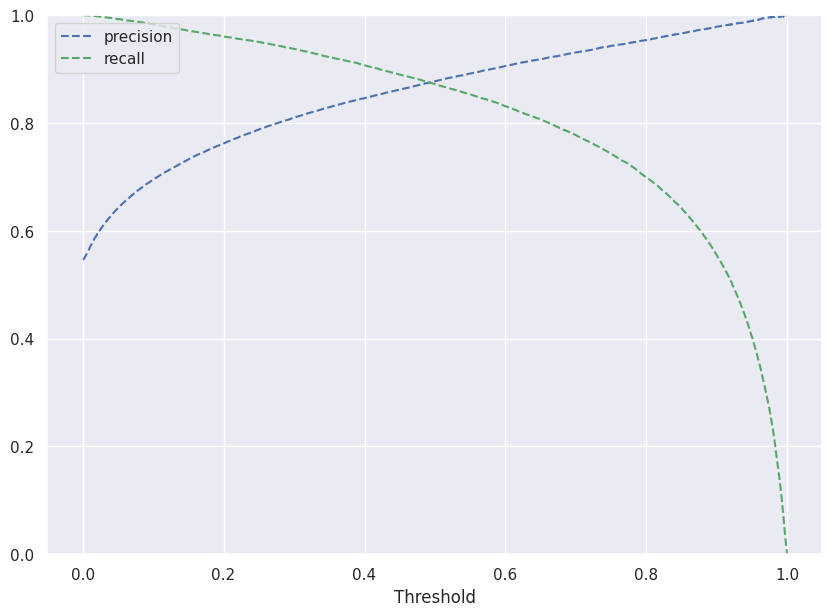

In [98]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

Since optimal threshold is close to 0.5 then we don't need to optimize the model anymore

In [ ]:
# Setting the optimal threshold
# optimal_threshold = 0.25

#### **Check the performance of the model on train and test data using the optimal threshold.**

In [99]:
# creating confusion matrix
# y_pred_train = lg.predict_proba(X_train)
# metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

#### Let's check the performance on the test set

In [100]:
# y_pred_test = lg.predict_proba(X_test)
# metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

### **Support Vector Machines**

To accelerate SVM training, let's scale the data for support vector machines.

In [37]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

TypeError: ignored

In [39]:
scaling2 = MinMaxScaler(feature_range=(-1,1)).fit(X_test_data)
X_test_data_scaled = scaling.transform(X_test_data)

TypeError: ignored

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



#### **Build a Support Vector Machine model using a linear kernel**

In [ ]:
svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

#### **Check the performance of the model on train and test data**

In [ ]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

#### Checking model performance on test set

In [ ]:
print("Testing performance:")
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

#### **Find the optimal threshold for the model using the Precision-Recall Curve.**


In [ ]:
# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

- In this case the threshold value of 0.25 seems to be good as it has good recall and there isn't much drop in precision.

In [ ]:
optimal_threshold_svm=0.25

#### **Question 5.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

Training performance:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2777
           1       0.43      0.56      0.48       644

    accuracy                           0.78      3421
   macro avg       0.66      0.69      0.67      3421
weighted avg       0.80      0.78      0.79      3421



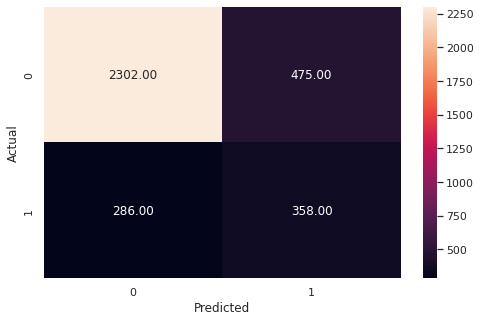

In [ ]:
print("Training performance:")
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

**Write your Answer here :**

- The model performance has improved by selecting the optimal threshold of 0.25.
- The recall has increased from 0 to 56%.

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1191
           1       0.45      0.60      0.52       276

    accuracy                           0.79      1467
   macro avg       0.68      0.72      0.69      1467
weighted avg       0.82      0.79      0.80      1467



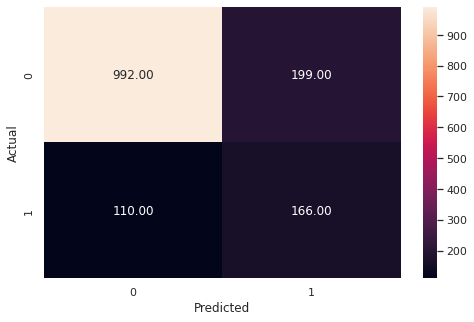

In [ ]:
y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

**Write your Answer here :**

* SVM model with **linear kernel** is not overfitting as the accuracy is around 78% for both train and test dataset
* The model has a **Recall** of 61% which is highest compared to the above models.
* At the optimal threshold of .25, the model performance has improved really well. The F1 score has improved from 0.00 to 0.52.

Lets try using non-linear kernel and check if it can improve the performance.

#### **Build a Support Vector Machines model using an RBF kernel**

In [ ]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

#### **Check the performance of the model on train and test data**



              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2777
           1       0.83      0.32      0.46       644

    accuracy                           0.86      3421
   macro avg       0.85      0.65      0.69      3421
weighted avg       0.86      0.86      0.83      3421



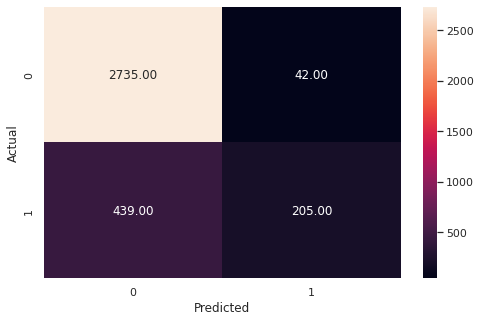

In [ ]:
y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1191
           1       0.79      0.26      0.39       276

    accuracy                           0.85      1467
   macro avg       0.82      0.62      0.65      1467
weighted avg       0.84      0.85      0.81      1467



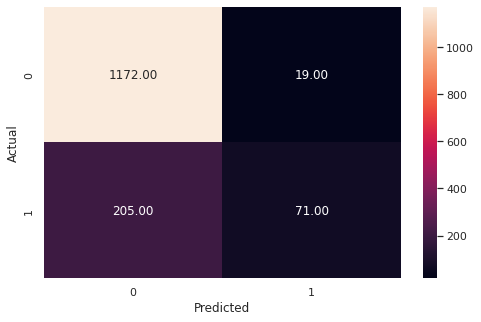

In [ ]:
y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

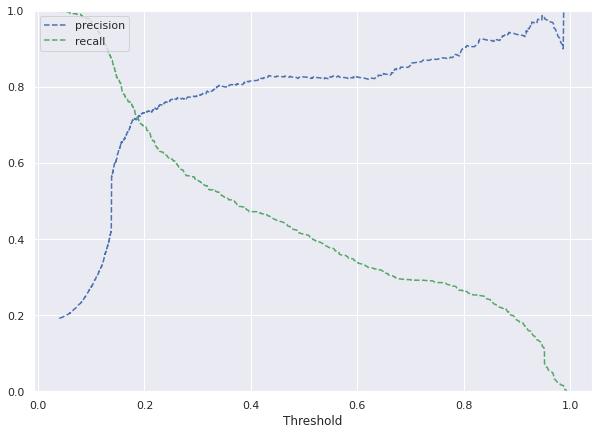

In [ ]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [ ]:
optimal_threshold_svm=0.17

#### **Check the performance of the model on train and test data using the optimal threshold.**

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      2777
           1       0.32      0.76      0.45       644

    accuracy                           0.65      3421
   macro avg       0.62      0.69      0.59      3421
weighted avg       0.80      0.65      0.69      3421



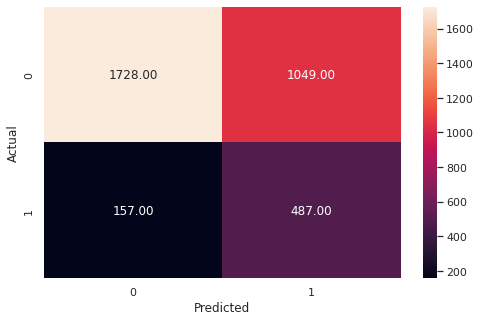

In [ ]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      1191
           1       0.55      0.69      0.61       276

    accuracy                           0.84      1467
   macro avg       0.74      0.78      0.76      1467
weighted avg       0.85      0.84      0.84      1467



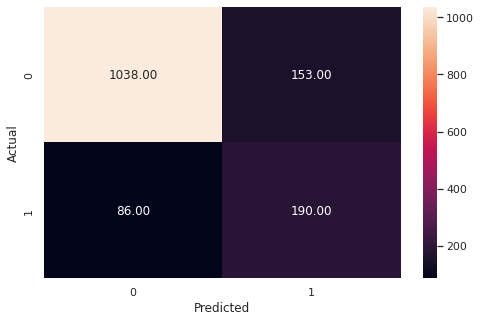

In [ ]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

### **Decision Trees**

#### **Build a Decision Tree Model**

In [36]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### **Check the performance of the model on train and test data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



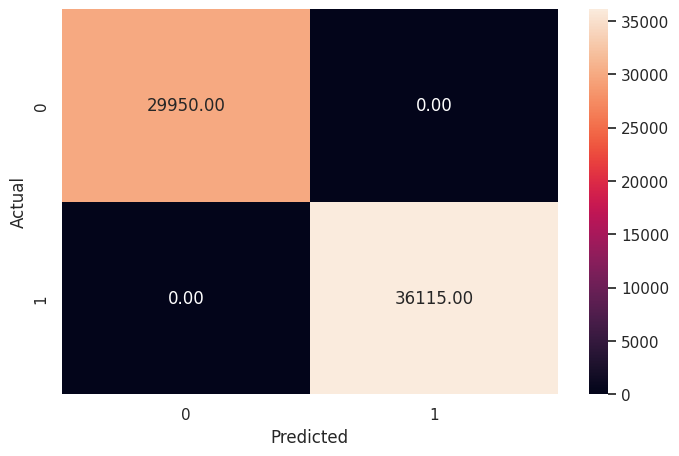

In [37]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12836
           1       0.93      0.93      0.93     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



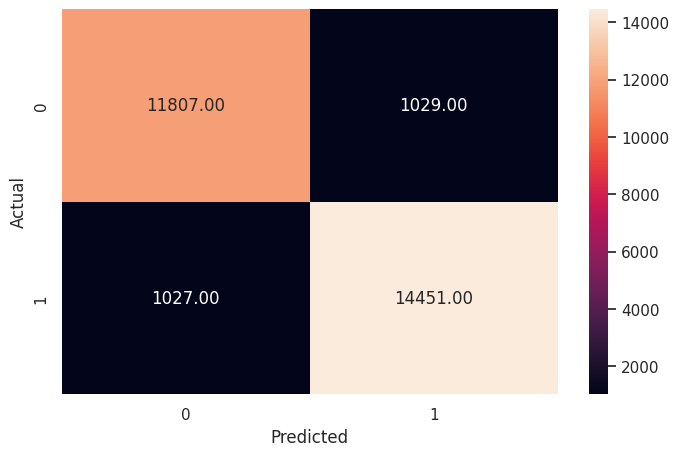

In [38]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

 #### **Perform hyperparameter tuning for the decision tree model using GridSearch CV**

In [39]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=250, min_samples_split=10,
                       random_state=42)

#### **Check the performance of the model on the train and test data using the tuned model**

#### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     29950
           1       0.94      0.94      0.94     36115

    accuracy                           0.93     66065
   macro avg       0.93      0.93      0.93     66065
weighted avg       0.93      0.93      0.93     66065



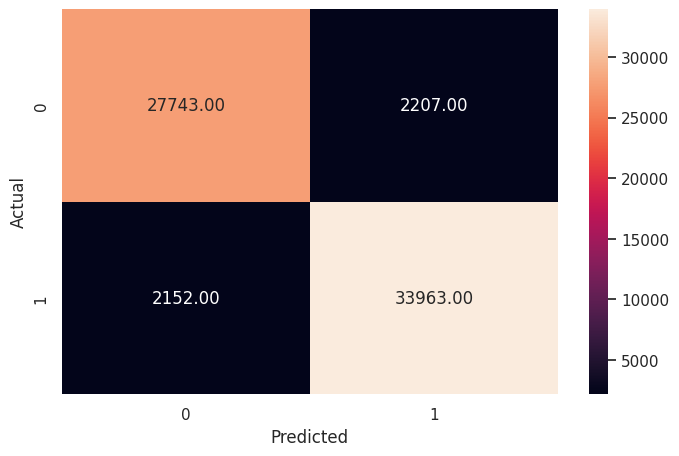

In [40]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     12836
           1       0.93      0.93      0.93     15478

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



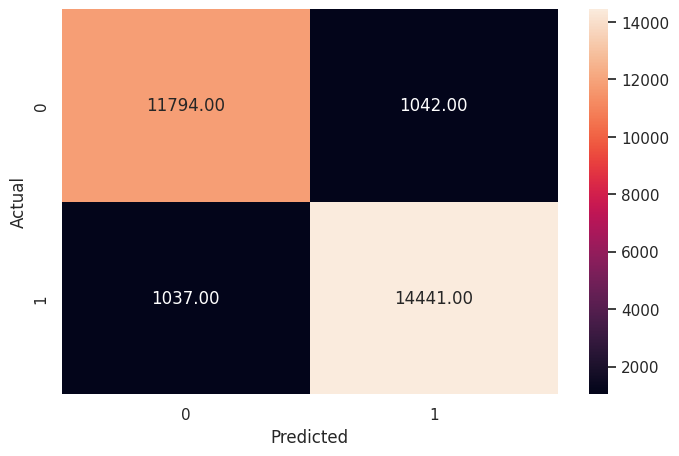

In [41]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

#### **Visualizing the Decision Tree**

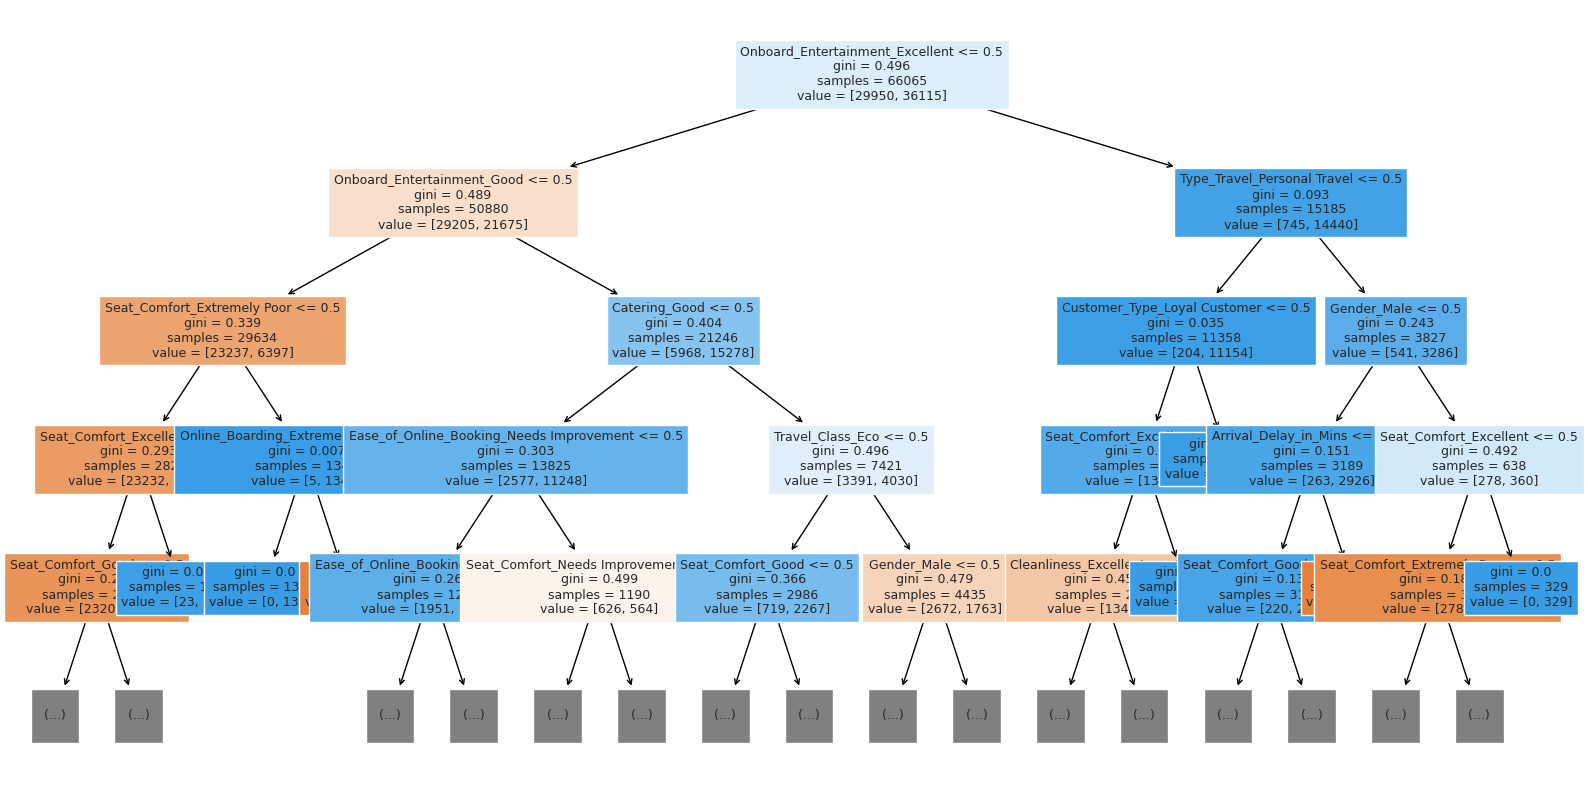

In [42]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **What are some important features based on the tuned decision tree?**

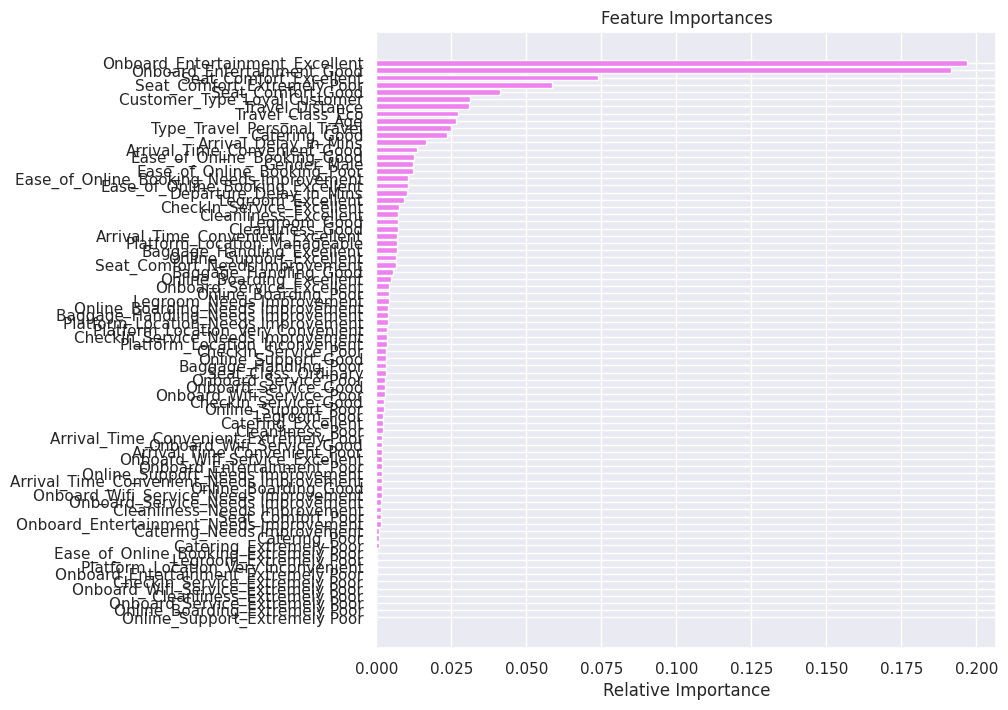

In [43]:
# Importance of features in the tree building
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Write your Answer here :**

* We can see that the tree has become simpler and the rules of the trees are readable.
* The model performance of the model has been generalized.


* We observe that the most important features are:
    * Monthly Income
    * Age
    - Number of trips


### Generate Results for Hackathon X_test_data (Submission 2)

In [51]:
dt_y_pred_X_test_data = estimator.predict(X_test_data)

In [52]:
dt_y_pred_X_test_data.size

35602

In [53]:
submission_2_pred_df = pd.DataFrame(dt_y_pred_X_test_data, columns=['Overall_Experience']) 

In [54]:
submission_2_ID_df = pd.DataFrame(ID_test_data,columns=['ID'])

In [55]:
submission_2_df = submission_2_ID_df.join(submission_2_pred_df)

In [56]:
submission_2_file_name = '/content/drive/MyDrive/MIT/Hackathon_Dataset/Submission_Hackathon_Apr2023_v2.csv'

In [57]:
submission_2_df.to_csv(submission_2_file_name, sep=',', encoding='utf-8', index=False)

### **Question 7: Random Forest (4 Marks)**

#### **Question 7.1: Build a Random Forest Model (1 Mark)**

In [44]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### **Question 7.2: Check the performance of the model on the train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



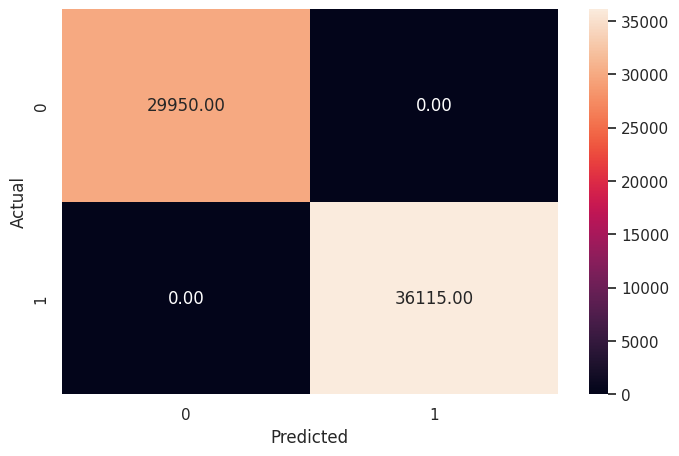

In [45]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Write your Answer here :**

- Almost 0 errors on the training set, each sample has been classified correctly.
- Model has performed very well on the training set.

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12836
           1       0.96      0.95      0.95     15478

    accuracy                           0.95     28314
   macro avg       0.95      0.95      0.95     28314
weighted avg       0.95      0.95      0.95     28314



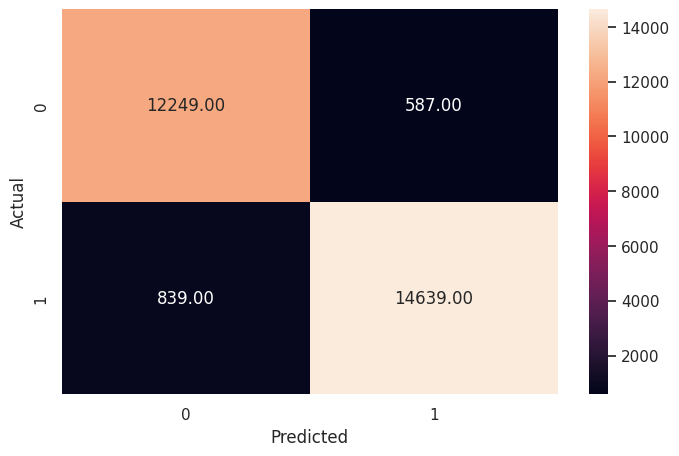

In [46]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Write your Answer here :**

* The Random Forest classifier **seems to be overfitting**.
- The recall score is 0.47 which is low compared to other models.
- We can reduce overfitting and improve recall by hyperparameter tuning.

#### **Question 7.3: What are some important features based on the Random Forest? (1 Mark)**

Let's check the feature importance of the Random Forest

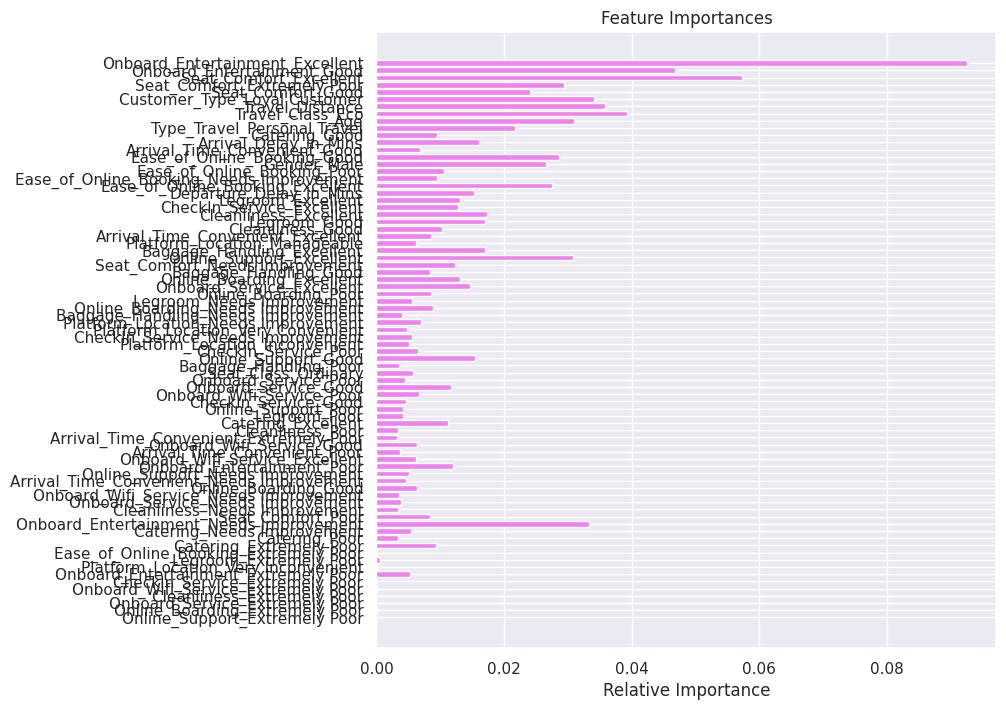

In [50]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
# sns.barplot(importance_df.Importance, importance_df.index,color="violet")

### Generate Results for Hackathon X_test_data (Submission 3)

In [58]:
rf_y_pred_X_test_data = rf_estimator.predict(X_test_data)
rf_y_pred_X_test_data.size

35602

In [59]:
submission_3_pred_df = pd.DataFrame(rf_y_pred_X_test_data, columns=['Overall_Experience'])  
submission_3_ID_df = pd.DataFrame(ID_test_data,columns=['ID'])
submission_3_df = submission_3_ID_df.join(submission_3_pred_df) 

In [60]:
submission_3_file_name = '/content/drive/MyDrive/MIT/Hackathon_Dataset/Submission_Hackathon_Apr2023_v3.csv'
submission_3_df.to_csv(submission_3_file_name, sep=',', encoding='utf-8', index=False)

 #### **Perform hyperparameter tuning for the random forest model using GridSearch CV**

In [ ]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "n_estimators" : [50, 100, 200, 300],
    "max_depth": [2, 4, 6, 8, 10, 12],
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [10, 30, 50, 70],
    "max_features": ['auto', 'sqrt']
    # "bootstrap" : [True, False]
}
# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, cv=5,scoring='precision',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

**Write your Answer here :**

- The Random Forest further verifies the results from the decision tree, that the most important features are monthly income, age and number of trips.
- monthly income is most important feature. If the monthly income of customer is high he/she is most likely to accept the tour package.
- Age is also a key feature, probably as customers with age between 25-50 are most likely to accept the newly introduced tour package.

### **Conclusion:**
- The SVM with RBF kenel has outperformed other models and provided balanced metrics.
- We have been able to build a predictive model that can be used by the tourist company to predict the customers who are likely to accept the new package with the recall score of 0.69 formulate marketing policies accordingly.


### **Question 8: Conclude ANY FOUR key takeaways for business recommendations (4 Marks)**

**Write your Answer here :**

- Our analysis shows that very few customers have passports and they are more likely to purchase the travel package. The company should customize more international packages to attract more such customers.
- We have customers from tier 1 and tier 3 cities but very few from tier 2 cities. The company should expand its marketing strategies to increase the number of customers from tier 2 cities.
- We saw in our analysis that people with higher income or at high positions like AVP or VP are less likely to buy the product. The company can offer short-term travel packages and customize the package for higher- income customers with added luxuries to target such customers.
- When implementing a marketing strategy, external factors, such as the number of follow-ups, time of call, should also be carefully considered as our analysis shows that the customers who have been followed up more are the ones buying the package.
- After we identify a potential customer, the company should pitch packages as per the customer's monthly income, for example, do not pitch king packages to a customer with low income and such packages can be pitched more to the higher-income customers.
- We saw in our analysis that young and single people are more likely to buy the offered packages. The company can offer discounts or customize the package to attract more couples, families, and customers above 30 years of age.

## **Happy Learning!**